## # STEP 1: Install Required Packages

In [1]:
pip install pandas numpy scikit-learn imbalanced-learn joblib matplotlib

Note: you may need to restart the kernel to use updated packages.


## # STEP 2: Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.pyplot as plt


## # STEP 3: Upload and Load the Data

In [3]:
df = pd.read_csv('employee attrition.csv') 

## # ✅ DEBUG: Check columns to verify "Attrition" exists

In [4]:
print("Columns in dataset:", df.columns.tolist())

Columns in dataset: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


## # STEP 4: Save the target column separately

In [5]:
target = df['Attrition']

## # STEP 5: Drop target from the features

In [6]:
df_features = df.drop('Attrition', axis=1)

## # STEP 6: One-Hot Encode Categorical Variables

In [7]:
df_encoded = pd.get_dummies(df_features, drop_first=True)

## # STEP 7: Set X (features) and y (target)

In [8]:
X = df_encoded
y = target

## # STEP 8: Train-Test Split (Stratified)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

## # STEP 9: Apply SMOTE on Training Data

In [10]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## # STEP 10: Create Pipeline (Scaling + Logistic Regression)

In [11]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

## # STEP 11: Train the Model

In [12]:
pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000, random_state=42))])

## # STEP 12: Evaluate on Test Data

In [13]:
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

In [14]:
print("\n✅ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


✅ Confusion Matrix:
[[228  19]
 [ 26  21]]


In [15]:
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))


✅ Classification Report:
              precision    recall  f1-score   support

          No       0.90      0.92      0.91       247
         Yes       0.53      0.45      0.48        47

    accuracy                           0.85       294
   macro avg       0.71      0.68      0.70       294
weighted avg       0.84      0.85      0.84       294



In [16]:
print("✅ AUC-ROC Score:", roc_auc_score(y_test, y_prob))

✅ AUC-ROC Score: 0.7197002325781722


## # STEP 13: Plot Confusion Matrix

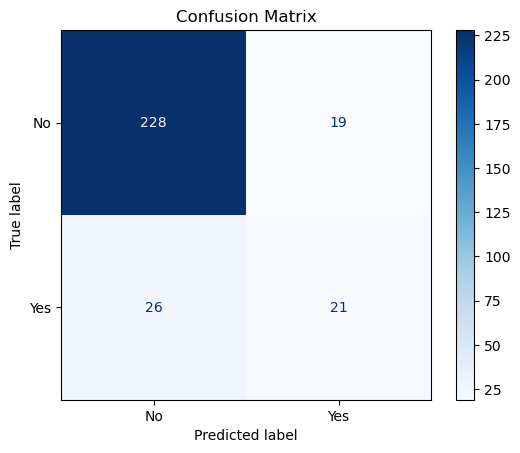

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=pipeline.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## # STEP 14: Save the Model

In [18]:
joblib.dump(pipeline, 'employee_attrition_model.pkl')
print("✅ Model saved as 'employee_attrition_model.pkl'")

✅ Model saved as 'employee_attrition_model.pkl'


## # STREAMLIT CODE : 

In [19]:
import streamlit as st
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# Set page config MUST be the very first Streamlit command
st.set_page_config(page_title="Employee Attrition Prediction - Enhanced", layout="wide")

# --- Your details ---
APP_TITLE = "Employee Attrition Prediction - Enhanced"
MODEL_PATH = 'employee_attrition_model.pkl'  # Update if needed
AUTHOR = "Aswin Prasath V"  # Your name

# --- Load model ---
@st.cache_resource  # cache model loading for better performance
def load_model(path):
    return joblib.load(path)

model = load_model(MODEL_PATH)

st.title(APP_TITLE)
st.write(f"Developed by: **{AUTHOR}**")
st.write("""
Upload a CSV file with employee data (same features as training except 'Attrition').
Or try single employee prediction below.
""")

# Function to convert model predictions to int
def convert_label(p):
    if p == 'Yes':
        return 1
    elif p == 'No':
        return 0
    else:
        try:
            return int(p)
        except ValueError:
            return 0

# --- Sidebar: Single employee input ---
st.sidebar.header("Single Employee Attrition Prediction")

def single_employee_input():
    # Adjust input widgets as per your dataset's features
    BusinessTravel = st.sidebar.selectbox("Business Travel", ["Travel_Rarely", "Travel_Frequently", "Non-Travel"])
    Department = st.sidebar.selectbox("Department", ["Sales", "Research & Development", "Human Resources"])
    EducationField = st.sidebar.selectbox("Education Field", ["Life Sciences", "Medical", "Marketing", "Technical Degree", "Other"])
    Gender = st.sidebar.selectbox("Gender", ["Male", "Female"])
    JobRole = st.sidebar.selectbox("Job Role", ["Sales Executive", "Research Scientist", "Laboratory Technician", "Manufacturing Director", "Healthcare Representative", "Manager", "Sales Representative", "Research Director", "Human Resources"])
    MaritalStatus = st.sidebar.selectbox("Marital Status", ["Single", "Married", "Divorced"])
    OverTime = st.sidebar.selectbox("OverTime", ["Yes", "No"])
    
    # Numeric inputs example - update with your actual numeric features
    Age = st.sidebar.number_input("Age", min_value=18, max_value=65, value=30)
    MonthlyIncome = st.sidebar.number_input("Monthly Income", min_value=1000, max_value=20000, value=5000)
    
    # Build dict for this single record
    emp_data = {
        'Age': Age,
        'MonthlyIncome': MonthlyIncome,
        'BusinessTravel': BusinessTravel,
        'Department': Department,
        'EducationField': EducationField,
        'Gender': Gender,
        'JobRole': JobRole,
        'MaritalStatus': MaritalStatus,
        'OverTime': OverTime
    }
    return pd.DataFrame([emp_data])

# Main app: choose mode
mode = st.radio("Select mode", ["Batch CSV Upload", "Single Employee Prediction"])

if mode == "Single Employee Prediction":
    st.subheader("Predict Attrition for Single Employee")
    single_emp_df = single_employee_input()
    st.write("Employee Input Data:")
    st.dataframe(single_emp_df)
    
    # Preprocess single employee input same as batch (one-hot, missing cols)
    categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
    single_encoded = pd.get_dummies(single_emp_df, columns=categorical_cols, drop_first=True)

    if hasattr(model.named_steps['scaler'], 'feature_names_in_'):
        expected_cols = model.named_steps['scaler'].feature_names_in_
    else:
        expected_cols = model.feature_names_in_

    for col in expected_cols:
        if col not in single_encoded.columns:
            single_encoded[col] = 0
    single_encoded = single_encoded[expected_cols]

    # Predict single employee
    pred_prob = model.predict_proba(single_encoded)[:, 1][0]
    pred_label = model.predict(single_encoded)[0]
    pred_label_int = convert_label(pred_label)

    st.write(f"Predicted Attrition Probability: **{pred_prob:.2f}**")
    st.write(f"Predicted Attrition: **{'Yes' if pred_label_int == 1 else 'No'}**")

else:
    # Batch CSV upload mode
    st.subheader("Batch Prediction: Upload CSV file")
    uploaded_file = st.file_uploader("Upload your employee data CSV", type=["csv"])

    if uploaded_file is not None:
        data = pd.read_csv(uploaded_file)
        st.write("Uploaded Data Preview:")
        st.dataframe(data.head())

        # Prepare data
        categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
        data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

        if hasattr(model.named_steps['scaler'], 'feature_names_in_'):
            expected_cols = model.named_steps['scaler'].feature_names_in_
        else:
            expected_cols = model.feature_names_in_

        # Validate uploaded features
        missing_cols = set(expected_cols) - set(data_encoded.columns)
        if missing_cols:
            st.error(f"Uploaded data is missing expected columns: {missing_cols}")
            st.stop()

        # Add missing columns as zero
        for col in expected_cols:
            if col not in data_encoded.columns:
                data_encoded[col] = 0

        data_encoded = data_encoded[expected_cols]

        # Predict
        pred_probs = model.predict_proba(data_encoded)[:, 1]
        predictions = model.predict(data_encoded)
        predictions = [convert_label(p) for p in predictions]

        # Add predictions to data
        data['Attrition_Predicted'] = predictions
        data['Attrition_Probability'] = pred_probs

        st.write("Predictions with Probability:")
        st.dataframe(data[['Attrition_Predicted', 'Attrition_Probability']])

        # Show histogram of probabilities
        st.write("Attrition Probability Distribution:")
        fig, ax = plt.subplots()
        ax.hist(pred_probs, bins=20, color='skyblue')
        st.pyplot(fig)

        # Filter by probability threshold
        threshold = st.slider("Filter employees by attrition probability threshold", 0.0, 1.0, 0.5)
        filtered_data = data[data['Attrition_Probability'] >= threshold]

        st.write(f"Employees with Attrition Probability ≥ {threshold}:")
        st.dataframe(filtered_data)

        # Download filtered data CSV
        csv = filtered_data.to_csv(index=False).encode('utf-8')
        st.download_button(
            label="Download Filtered Data as CSV",
            data=csv,
            file_name='filtered_employees.csv',
            mime='text/csv',
        )

    else:
        st.info("Please upload a CSV file to get predictions.")

# Footer
st.markdown("---")
st.markdown(f"Developed by {AUTHOR} | Powered by Streamlit and scikit-learn")


2025-05-15 06:47:32.117 
  command:

    streamlit run C:\Users\Aswin prasath v\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-15 06:47:32.125 Session state does not function when running a script without `streamlit run`


DeltaGenerator()